In [103]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import to_categorical

import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
(X_train, Y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, X_test.shape, Y_train

((60000, 28, 28), (10000, 28, 28), array([5, 0, 4, ..., 5, 6, 8], dtype=uint8))

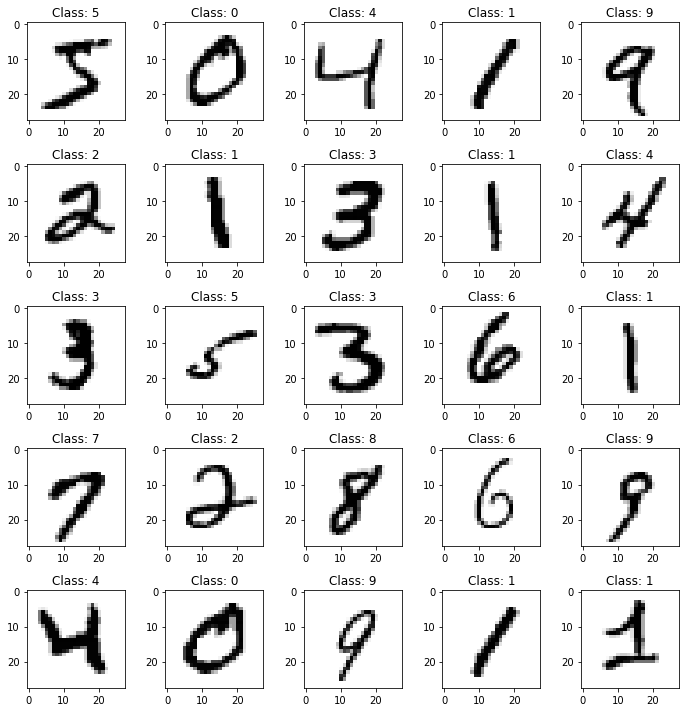

In [105]:
plt.figure(figsize=(10,10))
for idx in range(25):
    plt.subplot(5,5,idx+1)
    plt.imshow(X_train[idx], cmap='binary')
    plt.title('Class: {}'.format(Y_train[idx]))
    plt.tight_layout()

In [106]:
img_rows, img_cols = X_train.shape[1], X_train.shape[2]

X_train = X_train.reshape(-1, img_rows, img_cols, 1)
X_test = X_test.reshape(-1, img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [107]:
if np.max(X_train) >1: X_train = X_train / 255
if np.max(X_test) >1: X_test = X_test / 255

In [108]:
if len(Y_train.shape) == 1:
    num_classes = len(set(Y_train))
    Y_train = to_categorical(Y_train, num_classes)
    Y_test = to_categorical(y_test, num_classes)
Y_train[0], Y_test

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32),
 array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

In [109]:
model = Sequential([
    Conv2D(filters = 32, kernel_size = (3, 3), input_shape = input_shape),
    MaxPool2D(pool_size = (2, 2)),
    
    Conv2D(filters = 64, kernel_size = (3, 3)),
    MaxPool2D(pool_size = (2, 2)),
    
    Flatten(),
    
    Dense(512, activation = 'relu'),
    Dense(num_classes, activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])



In [110]:
model.fit(
    X_train, Y_train,
    batch_size=128,
    epochs=3,
    validation_data = (X_test, Y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 86s 1ms/step - loss: 0.1691 - acc: 0.9507 - val_loss: 0.0474 - val_acc: 0.9857
Epoch 2/3
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0464 - acc: 0.9858 - val_loss: 0.0350 - val_acc: 0.9880
Epoch 3/3
60000/60000 [==============================] - 85s 1ms/step - loss: 0.0298 - acc: 0.9907 - val_loss: 0.0351 - val_acc: 0.9883


In [112]:
score = model.evaluate(X_test, Y_test, verbose = 0)
score

[0.035118126580049286, 0.9883]